In [1]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import torch
from PIL import Image

# Загружаем изображение
img = Image.open('./dataset/test/photo_2024-05-18_13-32-11.jpg')

# Выполняем детекцию
model = torch.hub.load('ultralytics/yolov5', 'custom', path='./weights/best.pt') 
model.conf = 0.03  
model.iou = 0.03 
results = model(img)
roi
# Обрезаем картинку
boxes = results.xyxy[0]
box =  boxes[0]
conf, cls = box[4:].cpu().float().tolist()
roi = img.crop(box[:4].cpu().int().tolist())

# Определяем цифры
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-small-printed')
ocr_model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-small-printed').to(device)

def ocr(image, processor, model):
    pixel_values = processor(image, return_tensors='pt').pixel_values.to(device)
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return generated_text

ocr(roi, processor, ocr_model)

Using cache found in /home/gregory1m/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-5-18 Python-3.11.9 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce MX250, 1994MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-small-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


': 0240'

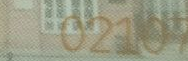

In [2]:
roi